### Linear Regression

A ***linear model*** makes a prediction by simply computing a weighted sum of the input features, plus a constant called the ***bias term*** (also called the ***intercept term***). The equation for a linear model called be written as:

\begin{equation}
\hat{y}=
_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n
\end{equation}

* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the $i$th feature value
* $\theta_j$ is the $j$th model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1, \theta_2,..., \theta_n$)

Or it can be written more concisely in the vectorized form:

\begin{equation}
\hat{y}=h_0(x)=\theta \cdot x
\end{equation}

* $\theta$ is the model's *parameter vector*, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
* x is the instance's *feature vector*, containing $x_0$ to $x_n$, with $x_0$ always equal to $1$
* $\theta \cdot x$ is the dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
* $h_0$ is the hypothesis function, using the model parameters $\theta$

In Machine Learning, vectors are represented as ***column vectors***, which are 2D arrays with a single column. If $\theta$ and $x$ are column vectors, then the prediction $\hat{y}=\theta^Tx$, where $\theta^T$ is the transpose of $\theta$ (a row vector instead of a column vector) and $\theta^Tx$ is the matrix multiplication of $\theta^T$ and $x$. It is the same prediction, but now it is represented as a single cell matrix rather than a scalar value.

The best way to measure the model accuracy for a linear regression model is to use the ***Root Mean Square Error***. We need to find a value of $\theta$ that minimizes the RMSE. The MSE of a Linear Regression hypothesis $h_\theta$ on a training set $X$ is calculated using:

\begin{equation}
MSE(X, h_\theta)=\frac{1}{m}\sum_{i=1}^m\big(\theta^Tx^{(i)}-y^{(i)}\big)^2
\end{equation}

A difference is that we write $h_\theta$ instead of $h$ because the model is parameterized by the vector $\theta$, but to simplify it will be shown as $MSE(\theta)$ instead of $MSE(X, h_\theta)$.

### Normal Equation

In order to find the value of $\theta$ that minimizes the cost function, there is a ***closed-form solution***, i.e. a mathematical equation that gives the result directly. This is called the ***normal equation***:

\begin{equation}
\hat{\theta}=\big(X^T \cdot X\big)^{-1} \cdot X^T \cdot y
\end{equation}

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function
* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

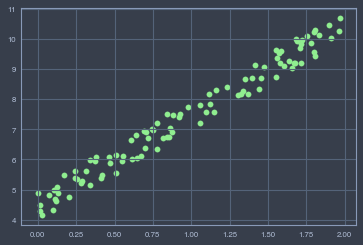

In [226]:
### We can test the normal function above by creating some linear data

import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y, c="lightgreen")
plt.show()

We can now compute $\hat{\theta}$ using the ***Normal Equation***. We can use the `inv()` function from *NumPy's* Linear Algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for the matrix multiplication.

In [227]:
### Add X\theta = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
print("Regular X: \n", X[:5])
print("X with 1 added to it (do do matrix multiplication): \n", X_b[:5])
### Our Normal Function
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta best: \n", theta_best)

Regular X: 
 [[0.92827651]
 [0.16871836]
 [0.7790198 ]
 [0.4624235 ]
 [0.12512782]]
X with 1 added to it (do do matrix multiplication): 
 [[1.         0.92827651]
 [1.         0.16871836]
 [1.         0.7790198 ]
 [1.         0.4624235 ]
 [1.         0.12512782]]
Theta best: 
 [[4.4932807 ]
 [3.01142301]]


Considering our original equation was $y=4+3x_1+Gaussian\hspace{.25cm}Noise$, our model prediction of $\hat{y}=4.467 + 3.05x_n$ is pretty close to the actual equation. remember that we will never be able to get it perfect because of the concept of ***irreducible error***.

We can now make predictions using $\hat{\theta}$:

In [228]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("Prediction for X_new: \n", y_predict)

Prediction for X_new: 
 [[ 4.4932807 ]
 [10.51612672]]


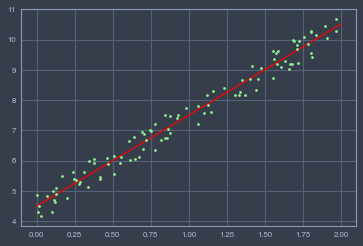

In [229]:
plt.plot(X_new, y_predict, "r-", c="red")
plt.plot(X, y, "b.", c="lightgreen")
plt.show()

It is even easier to perform a ***Linear Regression*** in `Scikit-Learn`

In [230]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Linear Regression Intercept: \n", lin_reg.intercept_,"\n", "Linear Regression Coefficient: \n", lin_reg.coef_)

Linear Regression Intercept: 
 [4.4932807] 
 Linear Regression Coefficient: 
 [[3.01142301]]


The LinearRegression class is based on the `scipy.linalg.lstsq()` function (the name stands for “***least squares***”), which you could call directly:

In [231]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta Best Single Value Decomposition: \n", theta_best_svd)

Theta Best Single Value Decomposition: 
 [[4.4932807 ]
 [3.01142301]]


This function computes $\hat{\theta}=X^+y$ where $X^+$ is the *pseudoinverse* of $X$ (specifically the Moore-Pearson inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [232]:
print("Pseudoinverse:\n", np.linalg.pinv(X_b).dot(y))

Pseudoinverse:
 [[4.4932807 ]
 [3.01142301]]


The ***pseudoinverse*** itself is computed using a standard matrix factorization technique called ***Singular Value Decompisition (SVD)*** that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \hspace{.5cm} \Sigma \hspace{.5cm} V^T$. The pseudoinverse is computed as $X^+=V\Sigma^+U^T$. To compute the matrix $\Sigma^+$ the algorithm takes $\Sigma$ and sets to zero all values smaleer than a tiny threshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the *Normal Equation*.

### Gradient Descent

***Gradient Descent*** is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The idea of ***Gradient Descent*** is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent is similar to being lost on a mountain in dense fog and can only feel the ground that is a couple feet in front of you. A good strategy to get to the bottom is to go down the steepest slope until you hit the valley. We are measuring the local gradient of the error function with regards to the parameter vector $\theta$, and it goes in the direction of descending gradient.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/Gradient_Descent.png width=500px>

You start by filling $\theta$ with random values (this is called ***random initialization***), and then you improve it gradually , taking one baby step at a time, with each step attempting to decrease the cost function, until the algorithm converges to a minimum. The ***learning rate*** is a parameter used to change the size of the steps in Gradient Descent model. Set it too small, and the algorithm will have to go through many iterations to converge, which will take a long time and a lot of your compute resources.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/GD_small.png width=500px>

If you make the ***learning rate*** too large, you can "jump across the valley" and end up farther up on the curve than you were before.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/GD_large.png width=500px>

These charts can be misleading when dealing with more complex models, as some cost functions have ridges, plateaus, holes, or other types of odd shapes, making it very difficult to converge to the minimum. You can end up converging on a ***local minimum***, which will not be as good as a ***global minimum***.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/GD_irregular.png width=500px>

When dealing with ***Linear Regression*** we will not have to worry about irregular shapes, because we use MSE as the cost function, and MSE is a ***convex function***, which means no two points have a line segment crossing the curve. We have to be careful in our search for parameters that minimize the cost function. It is a search for the model's ***parameter space***: the more parameters a model has, the more dimensions this space has, and the harder the search is. It is like searching for a  needle in a 500 dimensional haystack.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/GD.png width=500px>

### Batch Gradient Descent

When implementing ***Gradient Descent*** you need to calculate the gradient of the cost function with regards to each model parameter $\theta_j$. Which means, you will need to calculate how much the cost function will change if you change $\theta_j$ a small bit. This is referred to as a ***partial derivative***. In order to compute the partial derivative of a cost function with regards to parameter $\theta_j$, noted as $\frac{\partial}{\partial\theta_j}MSE(\theta)$:

\begin{equation}
\frac{\partial}{\partial\theta_j}MSE(\theta)=\frac{2}{m}\sum^m_{i=1}\big(\theta^Tx^{(i)}-y^{(i)}\big)x^{(i)}_j
\end{equation}

There is a way to calculate all the partial derivatives together instead of individually. You can use the gradient vector $\nabla_\theta MSE(\theta)$, which contains all the partial derivatives of a cost function. It can be viewed as:

\begin{equation}
\nabla_\theta MSE(\theta)=
    \begin{pmatrix}
    \frac{\partial}{\partial\theta_0}MSE(\theta)\\
    \frac{\partial}{\partial\theta_1}MSE(\theta)\\
    \vdots\\
    \frac{\partial}{\partial\theta_n}MSE(\theta)
    \end{pmatrix}
= \frac{2}{m}X^T(X\theta-y)
\end{equation}

Once you have the gradient vector that points uphil, just go in the opposite direction, which means you need to subtract $\nabla_\theta MSE(\theta)$ from $\theta$. Remember that we need to establish a *learning rate* ($\eta$). We need to multiply the gradient vector by $\eta$ to determine the size of the downhill slope. Gradient Descent Step can be viewed as:

\begin{equation}
\theta^{(next\hspace{.1cm}step)}=\theta-\eta \nabla_\theta MSE(\theta)
\end{equation}

In [233]:
### Set our learning rate to 0.1
eta = 0.1
n_iterations = 1000
m = 100

### Random initialization
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print("Our Theta is:\n", theta)

Our Theta is:
 [[4.4932807 ]
 [3.01142301]]


Our theta at different *learning rates*:

<img src =https://datadazed.s3-us-west-2.amazonaws.com/learning_rates.png width=500px>

* ***Left*** - Learning rate is too low, it will take forever to reach the solution
* ***Center*** - Learning rate is just right and was able to converge on the solution
* ***Right*** - Learning rate is too high and blew past the solution, and is continuing to grow past it

You can use ***[Grid Search](https://datadazed.com/2020/02/05/machine-learning-housing-example-project/#Finding_Hyperparameters_using_Grid_Search)*** to find a good learning rate.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solu‐ tion is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $\epsilon$ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum

### Stochastic Gradient Descent

The main issue with batch gradient descent, is that it uses the whol training set to compute the the gradients at every step, in turn, making it very slow when training large datasets. In that case, we can use ***Stochastic Gradient Descent*** which takes the opposite approach. ***Stochastic Gradient Descent*** picks a single instance at each step and then computes the gradient at that single instance. This makes the algorithm much faster, but also also more irregular at each step.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/SGD.png width=500px>


If the cost function is very irregular this can actually help the algorithm jump out of local minima, so ***Stochastic Gradient Descent*** has a better chance of finding the global minimum than ***Batch Gradient Descent does***. The randomness is good because it means that it can escape from local optima, but it can never settle at the minimum. You can try to reduce the learning rate gradually to try to avoid not being able to settle at the minimum. You can set a *learning schedule* to slow down the learning rate. You have to be careful because if you reduce the learning rate too quickly you can get stuck at the local minima. On the other hand, if it is reduced too slowly, you can end up jumping around the minima for a long time and end up with a poor solution.

In [234]:
### Each round will be called an epoch
n_epochs = 50
### Learning schedule hyperparameters
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
print("Stochastic GD theta: \n", theta)

Stochastic GD theta: 
 [[4.50849016]
 [3.00792036]]


In [235]:
### Now lets use the Scikit-Learn Package
from sklearn.linear_model import SGDRegressor

### max_iter = epochs, tolerance = loss drops, eta0 = learning rate
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print("SGD Intercept: \n", sgd_reg.intercept_, "\nSGD Coefficient: \n", sgd_reg.coef_)

SGD Intercept: 
 [4.47748619] 
SGD Coefficient: 
 [3.03014279]


### Mini-batch Gradient Descent

As you could probably guess by our previous sections, ***Mini-batch Gradient Descent*** is a combination of batch and stochastic gradient descent. It uses small samples at each step to calculate the gradient descent. We can compare the previous models as follows, keep in mind $m$ is the number of training instances, and $n$ is the number of features.

<img src=https://datadazed.s3-us-west-2.amazonaws.com/Regressor_Comparison.png width=500px>

### Polynomial Regression

If your data is more complex than a straight line, you can still use a linear model to fit non-linear data, by adding powers to each feature as new features, then train a model on these extended sets of features. This technique is called ***Polynomial Regression***.

Let's use a quadratic equation as an example:

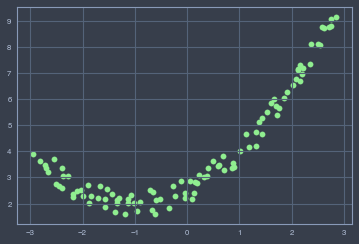

In [236]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

plt.scatter(X, y, c="lightgreen")
plt.show()

In [237]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("Value at index 0 of X: \n", X[0])
print("\nPolynomial Values: \n", X_poly[0])

Value at index 0 of X: 
 [-1.8815105]

Polynomial Values: 
 [-1.8815105   3.54008176]


Intercept: 
 [2.55193633] 
Coefficient: 
 [[1.01363581 0.48831054]]


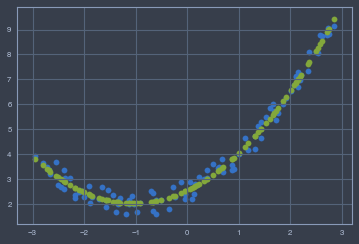

In [238]:
### X_poly now contains the original feature of X plus the square of this feature. 
### Now you can fit a LinearRegression model to this extended training data.

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
print("Intercept: \n", lin_reg.intercept_, "\nCoefficient: \n", lin_reg.coef_)

plt.scatter(X, y)
plt.scatter(X, y_pred)

### Learning Curve

